## Mandatory Assignment 

Important note: 
During this entire assignment i have reduced the datapoints to a lower and more usable level. My pc is unable to run all 7200000 datapoints that im given throughout this assignment. As such there may be some differences in the filter plots later on but from what i have checked they look correct. 

This part of the code is just the python version of the matlab code that we were given from the project_data file. Everything here works accordingly

In [2]:
pip install obspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 8.3 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 76.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install geographiclib

  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.2/859.2 kB 17.8 MB/s eta 0:00:0000:01
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 68.1 MB/s eta 0:00:00:00:0100:01
  Using cached basemap_data-1.3.2-py2.py3-none-any.whl (30.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
#This block contains all imports that we will be using throughout the assignment
import obspy as obs
import numba 
from numba import jit
import time
import os
import h5py
import datetime
import numpy as np
import matplotlib.pyplot as plt
from geographiclib.geodesic import Geodesic 
from mpl_toolkits.basemap import Basemap 

In [11]:
"""
Obtaining the cords for making the geodesic plot and storing the data and time points in their
respective arrays
"""
tonga_latlon = [-20.550, -175.385]
data_folder  = "data"
filname_list = os.listdir(data_folder)
file_amnt    = len(filname_list)

lats = np.zeros(file_amnt)
lons = np.zeros(file_amnt)
dt   = np.zeros(file_amnt)

my_lables = [list() for _ in range(file_amnt)]

data_collection  = [list() for _ in range(file_amnt)]
times_collection = [list() for _ in range(file_amnt)]

D = np.zeros(file_amnt)

E = Geodesic.WGS84

In [12]:
"""
The noticeable thing is there i reduced the amounts of calculations this for loop has 
to do by reducing the sample_amnt from our times_collection array
"""

ts = time.time()

for i in range(file_amnt):
    current_file_name = data_folder + "/" + filname_list[i]
    
    file = h5py.File(current_file_name)
    
    group_str = list(file.keys())[0]
    data_str  = list(file[group_str].keys())[0]

    lats[i] = file.attrs.get('latitude')
    lons[i] = file.attrs.get('longitude')
    
    data               = file[group_str][data_str]
    data_collection[i] = data;
    sample_amnt        = len(data)
    
    start_time_str      = file[group_str][data_str].attrs.get('starttime')
    start_time          = datetime.datetime.strptime(start_time_str, "%Y-%m-%dT%H:%M:%S.%fZ")
    dt[i]               = file[group_str][data_str].attrs.get('delta')
    deltas = np.linspace(0, dt[i]*sample_amnt,sample_amnt) #sample_amnt,sample_amnt)Sample amnt
    distance = E.Inverse(tonga_latlon[0], tonga_latlon[1], lats[i], lons[i])['s12'] #this can be removed
    times_collection[i] = [start_time + datetime.timedelta(seconds=deltas[ii]) for ii in range(0,sample_amnt,100)]

te = time.time()
print(te - ts)
print("done")

5.233598947525024
done


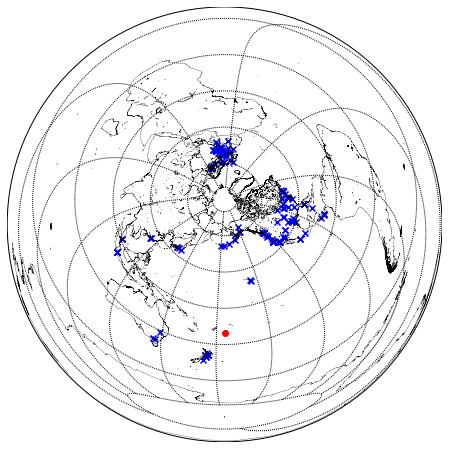

In [125]:
"""
Here is the Geodisc plot
"""

plt.figure(figsize=(16,8))
map = Basemap(projection='aeqd',lat_0=tonga_latlon[0]+90,lon_0=tonga_latlon[1],resolution='i')

# draw coastlines
map.drawcoastlines(linewidth=0.25, color="black")

# meridians and parallels are a bit weird with the given projection, but they can be visualized wth this code
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

# scatter plots longitude, latitude, unlike in MatLab
map.scatter(tonga_latlon[1], tonga_latlon[0],  marker='o', color='r', latlon=True)
map.scatter(lons, lats, marker='x', color='b', latlon=True)
plt.show()

In [13]:
#---Provided Impulse Response Filters---
h1 = [9.3102e-04, -1.2991e-18, -1.1771e-03, -8.9350e-04,  1.1279e-03,
      2.3259e-03, -3.0497e-18, -3.7419e-03, -2.8954e-03,  3.5886e-03,
      7.1273e-03, -6.7002e-18, -1.0473e-02, -7.7679e-03,  9.2793e-03,
      1.7882e-02, -1.0958e-17, -2.5342e-02, -1.8731e-02,  2.2575e-02,
      4.4596e-02, -1.4316e-17, -7.1659e-02, -6.0472e-02,  9.2253e-02,
      3.0157e-01,  3.9980e-01,  3.0157e-01,  9.2253e-02, -6.0472e-02,
     -7.1659e-02, -1.4316e-17,  4.4596e-02,  2.2575e-02, -1.8731e-02,
     -2.5342e-02, -1.0958e-17,  1.7882e-02,  9.2793e-03, -7.7679e-03,
     -1.0473e-02, -6.7002e-18,  7.1273e-03,  3.5886e-03, -2.8954e-03,
     -3.7419e-03, -3.0497e-18,  2.3259e-03,  1.1279e-03, -8.9350e-04,
     -1.1771e-03, -1.2991e-18,  9.3102e-04];

h2 = [6.8867e-04, -1.0409e-18, -8.7071e-04, -1.6144e-04,  2.4454e-03,
      4.3979e-03,  2.9653e-03,  1.8510e-04,  1.9464e-03,  9.1274e-03,
      1.2922e-02,  5.3683e-03, -6.4293e-03, -6.1213e-03,  7.3124e-03,
      1.0978e-02, -1.3170e-02, -4.5946e-02, -4.7642e-02, -1.5176e-02,
     -2.2060e-03, -5.5677e-02, -1.3549e-01, -1.3111e-01,  1.6668e-02,
      2.2307e-01,  3.2035e-01,  2.2307e-01,  1.6668e-02, -1.3111e-01,
     -1.3549e-01, -5.5677e-02, -2.2060e-03, -1.5176e-02, -4.7642e-02,
     -4.5946e-02, -1.3170e-02,  1.0978e-02,  7.3124e-03, -6.1213e-03,
     -6.4293e-03,  5.3683e-03,  1.2922e-02,  9.1274e-03,  1.9464e-03,
      1.8510e-04,  2.9653e-03,  4.3979e-03,  2.4454e-03, -1.6144e-04,
     -8.7071e-04, -1.0409e-18,  6.8867e-04];

h3 = [-2.4366e-04, -2.6135e-19,  3.0807e-04,  7.3294e-04,  1.3147e-03,
       2.0667e-03,  2.9630e-03,  3.9300e-03,  4.8428e-03,  5.5289e-03,
       5.7792e-03,  5.3643e-03,  4.0571e-03,  1.6578e-03, -1.9803e-03,
      -6.9275e-03, -1.3160e-02, -2.0549e-02, -2.8859e-02, -3.7759e-02,
      -4.6838e-02, -5.5636e-02, -6.3672e-02, -7.0487e-02, -7.5676e-02,
      -7.8923e-02,  9.2033e-01, -7.8923e-02, -7.5676e-02, -7.0487e-02,
      -6.3672e-02, -5.5636e-02, -4.6838e-02, -3.7759e-02, -2.8859e-02,
      -2.0549e-02, -1.3160e-02, -6.9275e-03, -1.9803e-03,  1.6578e-03,
       4.0571e-03,  5.3643e-03,  5.7792e-03,  5.5289e-03,  4.8428e-03,
       3.9300e-03,  2.9630e-03,  2.0667e-03,  1.3147e-03,  7.3294e-04,
       3.0807e-04, -2.6135e-19, -2.4366e-04];

### Task 1b)

Task here is to just sort the distances in an ascending order. We get the distances from E.Inverse func, where s12 contains the linear distance from Hunga Tonga to each of our stations.

In [14]:
great_circle = np.zeros(file_amnt) #We will use this to save the distances of all stations

for i in range(file_amnt): 
    great_circle[i] = (E.Inverse(tonga_latlon[0], tonga_latlon[1], lats[i], lons[i])["s12"])/1000 
    
    
#Here we sort out the values for future use
sorted_great_circle = sorted(great_circle)
    
print(f"Shortest 2D distance is: {min(great_circle)}km whilst the longest 2D distance is: {max(great_circle)}km ")

Shortest 2D distance is: 2132.9599486433935km whilst the longest 2D distance is: 17682.7855753007km 


### Task 1c)

Here we just plot the distances in their lats and longs to have a rought approximation
on how their distances would look like in a cordinate scale

Text(0, 0.5, 'Distance')

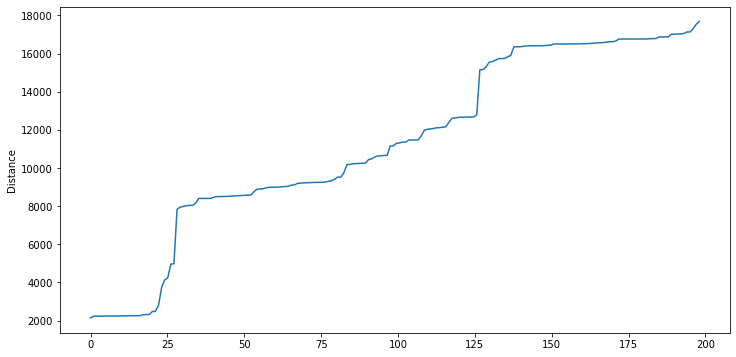

In [15]:
xt = np.linspace(0,len(great_circle),len(great_circle))

plt.figure(figsize = (12,6))
plt.plot(xt, sorted_great_circle)
plt.ylabel("Distance")

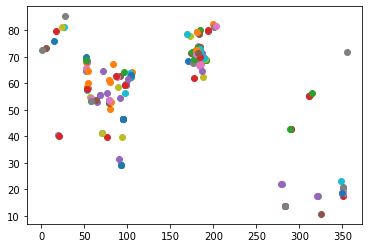

In [16]:
# we want to plot the vectorized distances of our stations
sorted_dist = np.zeros((201,2))

##NOTE might change this to use the great circle distance instead, makes it easier to read
###No clue why i have this here but im keeping it 

for i in range(file_amnt): 
    sorted_dist[i][0] = lats[i] - tonga_latlon[0]
    sorted_dist[i][1] = lons[i] - tonga_latlon[1]
    plt.scatter(abs(sorted_dist[i][1]), abs(sorted_dist[i][0]))


### Task 2 a)

We use the data that we are given from the filters and plot them all. The x axis here is just the length of the datapoints from our filter

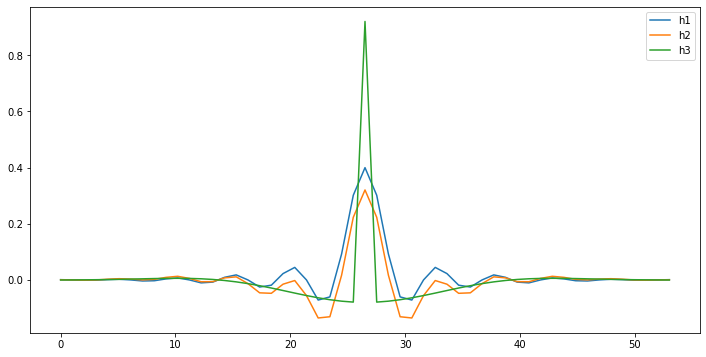

In [18]:
x = np.linspace(0, len(h1),len(h1))
plt.figure(figsize=(12,6))
plt.plot(x, h1, label = "h1")
plt.plot(x, h2, label = "h2")
plt.plot(x, h3, label = "h3")
plt.legend()

### Task 2 b)

Code here was used before in one of our earlier weekly tasks. Only difference is the if-test where we make sure that the distance 

In [20]:
"""
This code runs the convolution of an singal x with its h filter and has an if statement in case ylen == 0
"""

def convolution(x,h,ylen):
    M, N = len(h), len(x)
    y = np.zeros(M+N-1)
    
    for m in range(1, M):
        for n in range(1,N):
            i = n+m-1
            y[i] = y[i] + x[n]*h[m]
            
    if ylen == 0: #here the length will be equal to x
        a, b = int(np.floor(0.5*(M-1))), int(np.ceil(0.5*(M-1)))
        return y[b:int(M+N-1-a)]
    else: #Here it just returns the nomral length
        return y


### Task 2 c)

In [21]:
"""
Calculates the frequency spectrum of an x signal whislt returning the number of points in our unit circle
as well as the sampling frequency
"""

def freq_spec(x, N, fs):
    X = np.zeros(N)
    omega = np.linspace(0, np.pi, N)    #data points in its unit circle form
    for i in range(N):
        for j in range(len(x)):
            X[i] = X[i] +x[j]*np.exp(-1J*omega[i]*(j-1))
    f = (omega*fs)/(2*np.pi)

    return X,f


### Task 2 d)

In this task i decided to plot both my function and numpy inbuilt fft function just to see the difference and if the answer are anything else

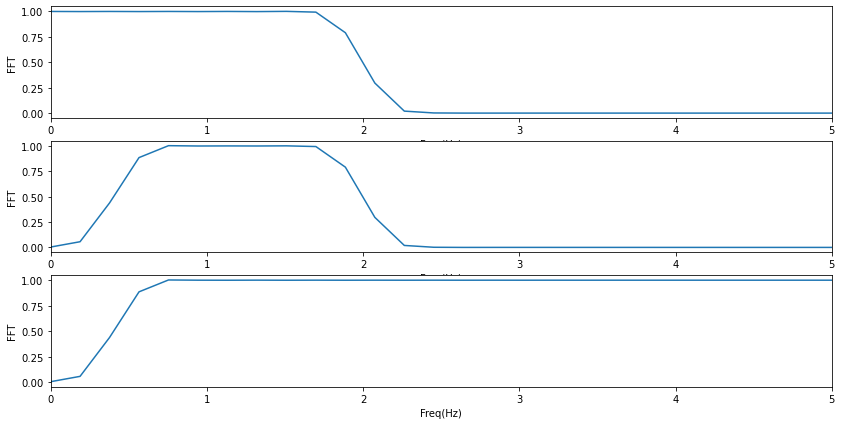

In [22]:
"""
This here is just to compare the numpy fft with my function above
"""

h1_test = np.fft.fft(h1)
h2_test = np.fft.fft(h2)
h3_test = np.fft.fft(h3)

N = len(h1_test)
sr = 10
n = np.arange(N)
T = N/sr
freq = n/T

fig, ax = plt.subplots(3 , figsize = (14,7))
ax[0].plot(freq, np.abs(h1_test))
ax[0].set_xlabel("Freq(Hz)")
ax[0].set_ylabel("FFT")
ax[0].set_xlim(0,5)

ax[1].plot(freq, np.abs(h2_test))
ax[1].set_xlabel("Freq(Hz)")
ax[1].set_ylabel("FFT")
ax[1].set_xlim(0,5)

ax[2].plot(freq, np.abs(h3_test))
ax[2].set_xlabel("Freq(Hz)")
ax[2].set_ylabel("FFT")
ax[2].set_xlim(0,5)

plt.show()

/tmp/ipykernel_560/757819379.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  X[i] = X[i] +x[j]*np.exp(-1J*omega[i]*(j-1))


Text(0, 0.5, 'FFT')

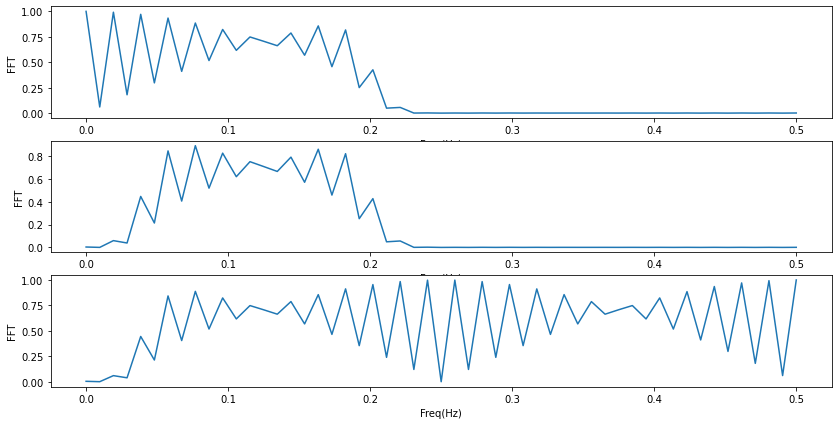

In [23]:
"""
Here is the fft from my function, this is used to compare it with the numpy inbuilt fft
"""

h1_freq = np.abs(freq_spec(h1, len(h1), 1))
h2_freq = np.abs(freq_spec(h2, len(h2), 1))
h3_freq = np.abs(freq_spec(h3, len(h3), 1))



fig, ax = plt.subplots(3 , figsize = (14,7))
ax[0].plot(h1_freq[1], h1_freq[0])
ax[0].set_xlabel("Freq(Hz)")
ax[0].set_ylabel("FFT")

ax[1].plot(h2_freq[1], h2_freq[0])
ax[1].set_xlabel("Freq(Hz)")
ax[1].set_ylabel("FFT")

ax[2].plot(h3_freq[1], h3_freq[0])
ax[2].set_xlabel("Freq(Hz)")
ax[2].set_ylabel("FFT")


### Task 2 e)

Based on the plot above we can see that h1 filter is a lowpass filter since it allows low frequency signals to pass through
h3 is a high pass filter since it filters out low frequency signals whilst allowing higher frequencies 
and h2 is an bandpass filter since it only works at a specific range through the frequency spectrum. Although my function is not as clean as numpys function, we can still understand what type of filter h1, h2 and h3 are.

### Task 2 f)

Here we extract from filname_list all h5py signals that we have stored, then we save them in a list
After doing that we can run all signals through our filter signals with the help of the convolution function
and then we store them in their own respective lists for future use

In [ ]:
ts = time.time()

h1_filter = np.zeros((file_amnt,7200))
h2_filter = np.zeros((file_amnt,7200))
h3_filter = np.zeros((file_amnt,7200))

for i in range(file_amnt):
    h1_filter[i] = convolution(data_collection[i][0:720000:100], h1, 0)
    h2_filter[i] = convolution(data_collection[i][0:720000:100], h2, 0)
    h3_filter[i] = convolution(data_collection[i][0:720000:100], h3, 0)

te = time.time()
print(te - ts)
print("done")

### Task 2 g)

Since we are wokring within infrasound which is low frequency, we want to use a lowpass filter so that we can have a better picture of our signals. An argument can be made to use the bandpass filter since we want to specifically measure a range of frequencies (since we are wokring within 0.1Hz to 20Hz) but since the lower frequencies is so low its unnecessary as we risk losing the lower end of the frequencies. As such in order to be safe we will use the lowpass filter

In [ ]:
st = obs.Stream()
for i in range(len(h1_filter[0:201])):
    tr = obs.Trace(h1_filter[i])
    tr.stats.distance = great_circle[i]
    
    tr.stats.starttime = times_collection[i][0] 
    tr.stats.times = times_collection[i][1:-1] 
    
    st += tr

st.plot(type='section',orientation='horizontal')
plt.show()

We can see that there is a noticeable concentration at different time points in our signals, giving it the characteristic straight triangle that we see from our report. As such this plot looks very correct

### Task 3 a) 

In this task supposedly you would have the for loop range set to the file_amnt but that means that we would be ploting all 201 station and the pdf would be painfully long, so im just printing our 4 of the stations to keep the pdf in a more readable format. Of course i ran the code on my own python IDE for all 201 stations, since we will need the data later on.

Click
Clicked []


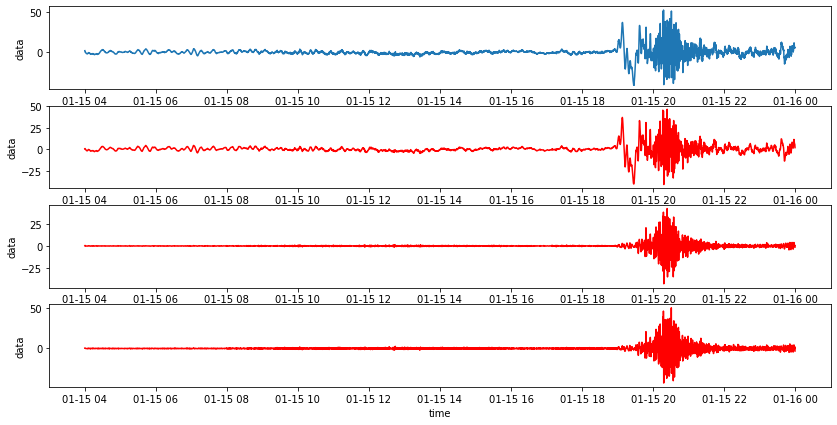

[]
Click
Clicked []


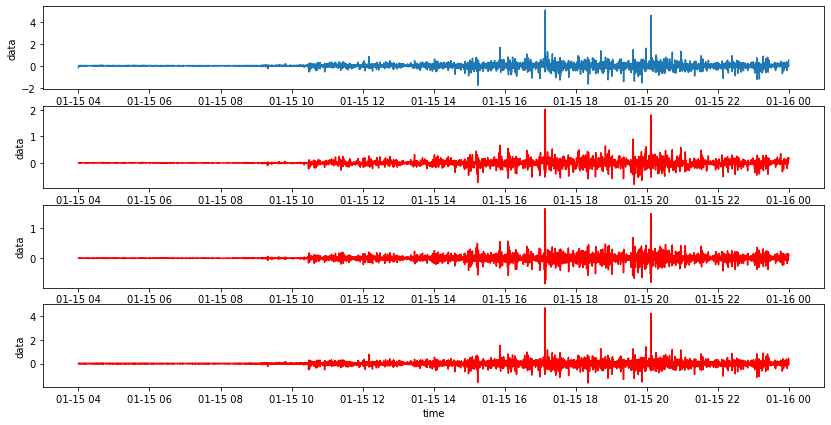

[]
Click
Clicked []


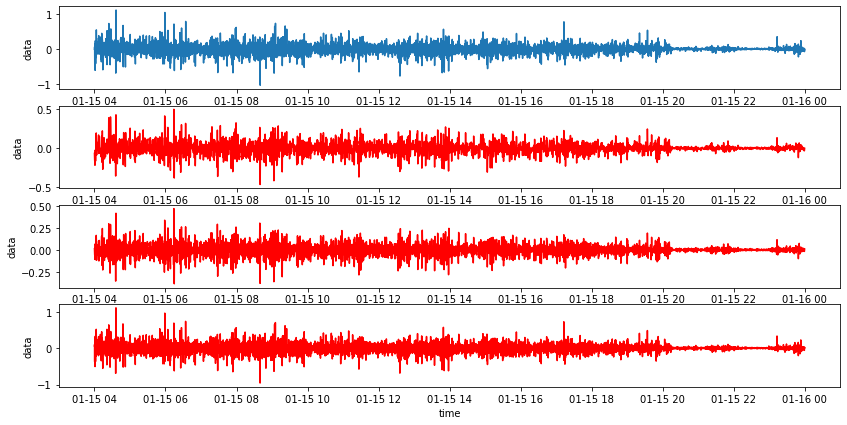

[]
Click
Clicked []


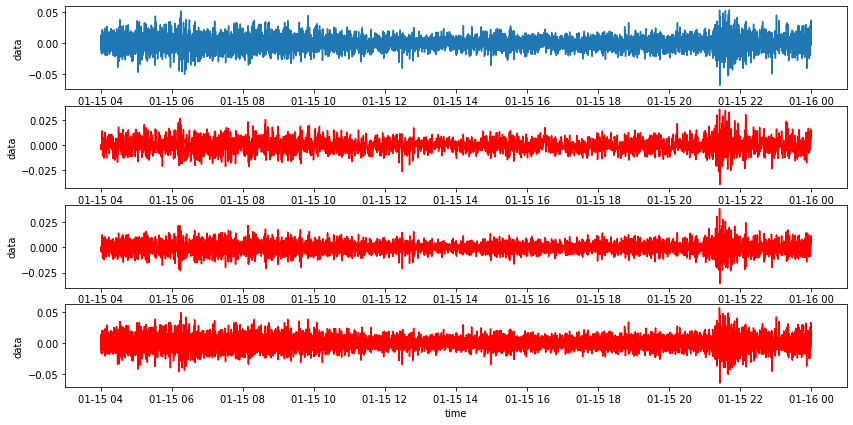

[]


In [8]:
click = [list() for _ in range(file_amnt)]

for i in range(4): #Here in my original code it would be / range(file_amnt):
    
    fig, ax = plt.subplots(4 , figsize = (14,7))
    

    ax[0].plot(list(times_collection[i]) , list(data_collection[i][0:720000:100]))
    ax[0].set_xlabel("time")
    ax[0].set_ylabel("data")
    
    ax[1].plot(list(times_collection[i]) , list(h1_filter[i]) , "r")
    ax[1].set_xlabel("time")
    ax[1].set_ylabel("data")
    
    ax[2].plot(list(times_collection[i]) , list(h2_filter[i]) , "r")
    ax[2].set_xlabel("time")
    ax[2].set_ylabel("data")
    
    ax[3].plot(list(times_collection[i]) , list(h3_filter[i]) , "r")
    ax[3].set_xlabel("time")
    ax[3].set_ylabel("data")
    
    print("Click")
    x = plt.ginput(1)
    print("Clicked" , x)
    plt.show()
    
    print(x)
    
    click[i] = x

Note: For some reason ginput doesnt work with jupyter so im unable to get my clicked values, as such i had to import my clicked values from python

### Task 3b) 

Below are the imported values from python 

In [18]:
# [[19007.488417358258, 0.10306330453013901], [19007.24822848716, 130.60108099719582],[19007.251667029523, 0.2447903074691915]
estarrivals = [[19007.257038106112, 0.13210435783589247], [19007.25703810607, 0.059697709567144486], [19007.254352567805, 0.026096350899070586], [19007.251667029523, -0.025982888194194587], [19007.2489814913, -0.10980696740052132], [19007.259723644347, 0.02083905274371567], [19007.254352567787, 0.02119512549692537], [19007.25166698247, -0.22305128446596711], [19007.257038059364, 0.07115129623943162], [19007.257038106127, 0.17795122779502925], [19007.25972364533, 0.16586103982750267], [19007.257038106105, 0.16105367072984578], [19007.248981491222, -0.06338008466445011], [19007.257038106076, -0.04694038861122429], [19007.25972364436, -0.06540015475134986], [19007.25286995809, 0.0508417069634981], [19007.68946861418, 11.841536087182817], [19007.263830255568, 0.05120840863772935], [19007.265235671992, 0.45704666548925843], [19007.27583688233, 0.43091371921404154], [19007.312250955212, 0.8361644843282008], [19007.228742663556, 0.20928957628246003], [19007.323979896868, 0.10694888781790235], [19007.35794623847, 4.859743097135038], [19007.364459618922, 0.5771028027869747], [19008.001009611486, 5.178014819628892], [19007.491157982913, 0.09885261264956835], [19007.478293725006, 12.391661296002098], [19007.59534029341, 6.163895847694334], [19007.488417317214, 0.10479303221023883], [19007.493898587265, 0.09124417869913515], [19007.470127671182, 1.4407800227210572], [19007.496639191828, 0.09655733513043874], [19007.49115798972, 0.0388411755851612], [19007.493898627883, 0.05113752104771585], [19007.49389847983, 0.05313652204671585], [19007.493898566958, 0.07484196311966151], [19007.500274359638, 0.22595385223892883], [19007.507601704485, 0.1750956170904967], [19007.49937985019, 0.18072114180883236], [19007.509478676475, 0.21104592281096402], [19007.495292857395, 0.08393519548338091], [19007.49673791409, 0.05421617734232509], [19007.508235870413, 0.3165884783416679], [19007.512257955237, 0.0988630164862947], [19007.49673790063, 0.03864354325134123], [19007.557818373905, 0.6314388772612922], [19007.5014220679, 0.10838343410939721], [19007.516401877674, 0.28373469745216084], [19007.50679311823, 0.21647563251909574], [19007.510342335838, 0.12329621096016563], [19007.51582357888, 0.07342460567108144], [19007.518564210135, 0.04671104914327184], [19007.532359031058, 0.049531237726363475], [19007.530011976163, 0.8797932305553502], [19007.502120494868, 0.09398988535155173], [19007.515823604816, 0.18219172984859267], [19007.531053081202, 0.08017152664118754], [19007.5337381558, 0.18028576712248068], [19007.521304822072, 0.17662308529611526], [19007.52836809464, 0.1794600183676991], [19007.522906387745, 0.3505811372123837], [19007.584753616607, 0.7034764576285184], [19007.60078701494, 0.5887595364017209], [19007.789946430265, 0.01243178847068549], [19007.544478197746, 0.22337018898295113], [19007.54798638178, 0.19875382446110734], [19007.541705155923, 0.1876779634429564], [19007.547076196042, 0.2856278709331832], [19007.5444782161, 0.2387560887001996], [19007.536736798065, 0.034835838239641426], [19007.53687186376, 0.054964208363984746], [19007.52952669657, 0.08320443244956666], [19007.53633407308, 0.18807896770086785], [19007.519123923288, 1.1627165924458325], [19007.545970439493, 0.17817393456087594], [19007.521845936506, 0.8441051187005826], [19007.547986351477, 0.03411286415498582], [19007.54090002904, 1.6384052019852362], [19007.540072733373, 19.924004222065037], [19007.56050393002, 0.1434815453952325], [19007.582068558575, 1.0330439354652832], [19007.59810145504, 0.781187420518723], [19007.60350635445, 0.2803529297533345], [19007.578857954915, 0.058085861168719166], [19007.611748076844, 7.301206124208079], [19007.735063892498, 0.775476020135148], [19007.638454062497, 1.3592389343089977], [19007.603601372062, 0.05814530289611852], [19007.54322981462, 0.07390131696004176], [19007.603523572445, 0.2943647883214453], [19007.590044828958, 1.8541358530124334], [19007.598042344507, 0.02151896467054526], [19007.496639252433, 0.557094513912233], [19007.606264223774, 
0.14944797480411953], [19007.611745441605, 0.07917532915737358], [19007.61690021829, 0.4366578272402979], [19007.62764236174, 0.44881103396287614], [19007.627642371815, 0.3857491781897249], [19007.66066861526, 2.806367270897397], [19007.622707956227, 0.09782614219857155], [19007.62856637242, 0.29118571448339026], [19007.54090002287, 0.21325777907840404], [19007.62764236174, 0.24647189043380635], [19007.62495681822, 0.14449934315898005], [19007.53364850344, 0.3209325124368547], [19007.63569899683, 0.5306136735139333], [19007.592618280192, 0.9330210777215413], [19007.651879199326, 0.1747899692799706], [19007.651812221968, 0.9934774487147653], [19007.654497746247, 0.12393917105558572], [19007.64375560693, 1.636327453429395], [19007.756548224195, 0.37259583821450093], [19007.667925443013, 0.2020940960324129], [19007.729692834007, 0.41390785695589116], [19007.684038682124, 0.3383324148938165], [19007.590044823424, 0.3167705280325759], [19007.689409771516, 0.3580353300092085], [19007.677583776986, 0.12997005769509196], [19007.630929840372, 0.06662421453481482], [19007.674843700675, 0.38295630812137915], [19007.68574231641, 0.17732780117598113], [19007.181594294994, 3.7601959424833495], 
[19007.700151891728, 0.3528401957975582], [19007.492413899323, 0.4077005412110779], [19007.781664196456, 0.03398227168236412], [19007.786089139277, 0.46383633223536336], [19007.78416922743, 0.09001398729049503], [19007.787145436916, 0.09721793055820438], [19007.80220236659, 0.17267462863723537], [19007.81563007146, 0.26676354045980055], [19007.807610616128, 0.3683250394486315], [19007.715108871143, 2.165751838097151], [19007.807573440656, 0.11642400844035095], [19007.81455167677, 0.17433981387977404], [19007.80928618996, -0.001039795288109567], [19007.81310135091, 4.9428464039216635], [19007.818545377348, 7.707935859428517], [19007.831743284016, 0.4318477128740845], [19007.78860323194, 5.058540128743033], [19007.78592310709, 5.244755762402775], [19007.79680904779, 6.31397860336395], [19007.80225201814, 5.185456953722479], [19007.79404725838, 2.4024282993941597], [19007.794087562615, 3.6071146623573895], [19007.813262500495, 11.850669401144728], [19007.807657324473, 4.778577970466699], [19007.847856512548, 0.20816612813764124], [19007.799530532968, 7.447707171576468], [19007.791366077443, 6.035773913113246], [19007.79404725838, 11.010535997883835], [19007.791366077443, 7.6447861828326324], [19007.799530532968, 6.329571613626285], [19007.799530532968, 5.750643058586974], [19007.793946053018, 7.498523521154368], [19007.80368294676, -0.0003034871215343176], [19007.783677877, 0.00027844356356346257], [19007.816021992992, 8.264604730256337], [19007.791325245158, 6.422617226380964], [19007.845170971857, 0.3257942314305353], [19007.839799892536, 0.1606219786137313], [19007.837599465278, 0.7340195351035419], [19007.84195792324, 0.08302911449021755], [19007.841989163153, 0.09438827777013437], [19007.84472925468, 0.7855460049473635], [19007.83650897525, 0.07127356093359793], [19007.859375573607, 0.276431059014115], [19007.83921730969, 0.05591297659963246], [19007.81037832868, 0.7718986272566823], [19007.845200955904, -0.0006792337093166623], [19007.625078739522, 0.39051762823585534], [19007.850856143934, 0.14221525288105896], [19007.83215544344, 2.936282084338785], [19007.829433430223, 2.4153955557182627], [19007.837599469876, 3.686994882187065], [19007.837599469876, 4.5145750583296405], [19007.829433430223, 1.8343842830971937], [19007.83487745666, 1.3559121609841895], [19007.83215544344, 1.8847323549448305], [19007.83215544344, 1.616244133452014], [19007.847439181707, 0.2732744355485788], [19007.851209535973, 1.1709195960802248], [19007.854588562946, 5.315741862798376], [19007.829433420604, 0.40601328372289913], [19007.856653560357, 1.1826534653026712], [19007.844729241482, 0.061523897355991064], [19007.853634769977, 0.03317432152992805], [19007.85088604091, 
0.06117371392226234], [19007.86399612911, 0.1227630575736427], [19007.842485442306, 0.22378969464462273], [19007.86396975721, -0.0009308927376459053], [19007.84743917521, 0.056872055411825606], [19007.84785651038, 0.3073623966072496], [19007.84785652341, 0.337430678770815], [19007.852949514196, 0.060357319636364704], [19007.877586047016, 0.07926088024296263], [19007.882768519743, 0.025039941400262222], [19007.888548558043, 0.03675440048194545]]

Here we use the estarrivals values to finally find the distance to station based on the time

In [32]:
xaxis = []
yaxis = []

for i in range(file_amnt):
    xaxis.append(estarrivals[i][0])
    yaxis.append(estarrivals[i][1])

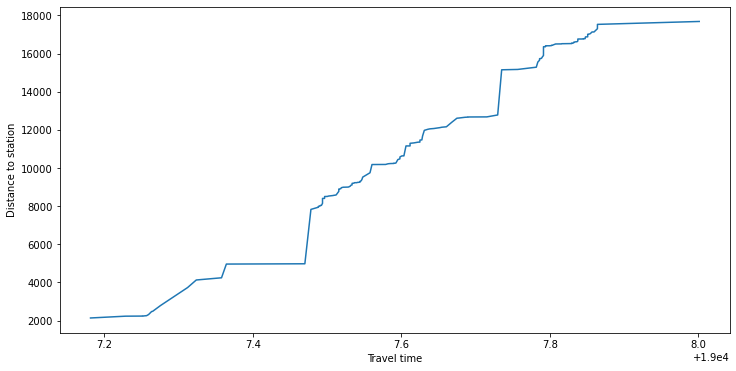

In [12]:
  plt.figure(figsize=(12,6))
plt.plot(sorted(xaxis),sorted_great_circle)
plt.xlabel("Travel time")
plt.ylabel("Distance to station")
plt.savefig("distance_to_station.pdf") #incase to save the fig

### Task 3c) 

There are some noticable noise from the plot above, most noticably from the station that are around the 6000km away and those at around 13000km away. We could try to filter them out in order to make a "straighter" line.

### Task 3d) 

Our line doesnt really match with the corresponding data from the paper report, so i did a regression of the data points from the distances and the time points in order to get a "better looking" plot

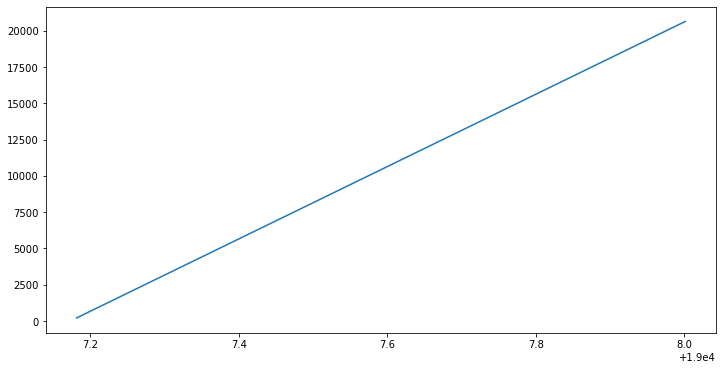

In [61]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(sorted(xaxis), sorted_great_circle)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, sorted(xaxis)))

plt.figure(figsize = (12,6))
plt.plot(sorted(xaxis), mymodel)
plt.show()